In [1]:
# 데이터 : fruits_300.npy   과일데이터  사과 파일애플 바나나
# 훈련용과 테스트용으로 데이터를 나눔
# 훈련용 1. 스케일, 2. 3dim -> 2dim
# dense
# Sequential
# compile
# fit
# evaluate

In [1]:
import numpy as np
import pandas as pd

In [4]:
fruits =  np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [6]:
target = [0]*100 + [1]*100 + [2]*100

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(fruits, target, test_size=0.2, random_state=0)

In [8]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [9]:
x_train_scaled_reshape = x_train_scaled.reshape(-1,100*100)
x_test_scaled_reshape = x_test_scaled.reshape(-1,100*100)

In [12]:
x_train_scaled_reshape.shape, len(y_train)

((240, 10000), 240)

In [26]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
dense = Dense(3,activation = 'softmax', input_shape=(10000,) )

In [24]:
model = Sequential(dense)

In [25]:
model.compile(loss=sparse_categorical_crossentropy, metrics='accuracy')

In [30]:
y_train = np.array(y_train)

In [31]:
model.fit(x_train_scaled_reshape,y_train, epochs=5)

Epoch 1/5
8/8 [==============================] - 0s 4ms/step - loss: 1.7015 - accuracy: 0.5958
Epoch 2/5
8/8 [==============================] - 0s 3ms/step - loss: 0.4359 - accuracy: 0.8625
Epoch 3/5
8/8 [==============================] - 0s 5ms/step - loss: 0.0790 - accuracy: 0.9917
Epoch 4/5
8/8 [==============================] - 0s 5ms/step - loss: 0.0553 - accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 1.0000


In [32]:
y_test = np.array(y_test)

In [35]:
model.evaluate(x_test_scaled_reshape,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 1.0000


[0.03816811367869377, 1.0]

In [43]:
y_test

array([2, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1])

In [37]:
predict_score = model.predict(x_test_scaled_reshape)

2/2 [==============================] - 0s 2ms/step


In [44]:
np.argmax(predict_score,axis=1)

array([2, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1], dtype=int64)

In [47]:
fruits_reshape = fruits.reshape(-1,100*100)
fruits_reshape_scaled = fruits_reshape / 255.0

In [49]:
total_score = model.predict(fruits_reshape_scaled)

10/10 [==============================] - 0s 2ms/step


In [50]:
np.argmax(total_score,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [52]:
np.array(target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
1.2e-02

0.012

In [54]:
1.2e+02

120.0

In [139]:
pd.read_csv('https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
# 타이타닉 머신러닝 VS 딥러닝
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/train.csv'
titanic = pd.read_csv(url)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [80]:
X = titanic[['Survived', 'Pclass', 'Sex','Age']]

In [81]:
# X['Sex'] = X['Sex'].map({'male':0,'female':1})
tempindex = X[X['Sex'] == 'male'].index
X.loc[tempindex,'Sex'] = 0

In [82]:
tempindex = X[X['Sex'] == 'female'].index
X.loc[tempindex,'Sex'] = 1

In [87]:
# 결측치 확인
X.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [91]:
# 결측치가 있는 모든 row를 출력
X[X.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age
5,0,3,0,NaN
17,1,2,0,NaN
19,1,3,1,NaN
26,0,3,0,NaN
28,1,3,1,NaN
...,...,...,...,...
859,0,3,0,NaN
863,0,3,1,NaN
868,0,3,0,NaN
878,0,3,0,NaN


In [97]:
Y = X.iloc[:,0]
X = X.iloc[:,1:]

In [98]:
X.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [100]:
# Pclass 별 Sex별 Age의 중위수 
grouped = X.groupby(['Pclass','Sex'])
grouped['Age'].median()

Pclass  Sex
1       0      40.0
        1      35.0
2       0      30.0
        1      28.0
3       0      25.0
        1      21.5
Name: Age, dtype: float64

In [103]:
grouped['Age'].transform('median')

0      25.0
1      35.0
2      21.5
3      35.0
4      25.0
       ... 
886    30.0
887    35.0
888    21.5
889    40.0
890    25.0
Name: Age, Length: 891, dtype: float64

In [104]:
# fillna, transfer
# X['Age'] = X['Age'].fillna(grouped['Age'].transform('median'))
X['Age'].fillna(grouped['Age'].transform('median'), inplace=True)

In [105]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

In [107]:
X.shape, Y.shape

((891, 3), (891,))

In [108]:
# 8:2로 데이터를 분할
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [113]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled =  ss.transform(x_test)

In [126]:
# 딥러닝   모델(신경망 -연결 - 컴파일) - 학습(fit) - 평가(evaluate) - 예측(predict)
# 이진분류는.. 둘중에 하나... 출력 1
# 그외 다중은 실제 갯수만큼....
from tensorflow.keras.losses import binary_crossentropy
dense = Dense(1,activation='sigmoid',input_shape = (3,) )
model = Sequential(dense)
model.compile(loss=binary_crossentropy,metrics='accuracy')

In [127]:
model.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.7149
Epoch 2/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.7528
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7640
Epoch 4/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6368 - accuracy: 0.7753
Epoch 5/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.7837
Epoch 6/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.7865
Epoch 7/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.7865
Epoch 8/20
23/23 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7865
Epoch 9/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.7865
Epoch 10/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.7865
Epoch 11/20
23/23 [

In [128]:
model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7877


[0.544386625289917, 0.7877094745635986]

In [130]:
predics = model.predict(x_test_scaled)

6/6 [==============================] - 0s 2ms/step


In [138]:
import warnings
warnings.filterwarnings('ignore')
np.round(predics)[:10], y_test[:10]

(array([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]], dtype=float32),
 495    0
 648    0
 278    0
 31     1
 255    1
 298    1
 609    1
 318    1
 484    1
 367    1
 Name: Survived, dtype: int64)

In [3]:
##성능개선을 위한 데이터 탐색 EDA
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/train.csv'
df = pd.read_csv(url)

In [4]:
df.nunique(dropna=False)  # 결측치 포함

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

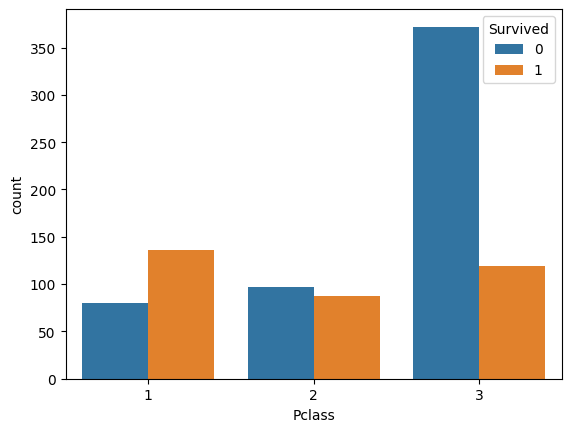

In [6]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.show()

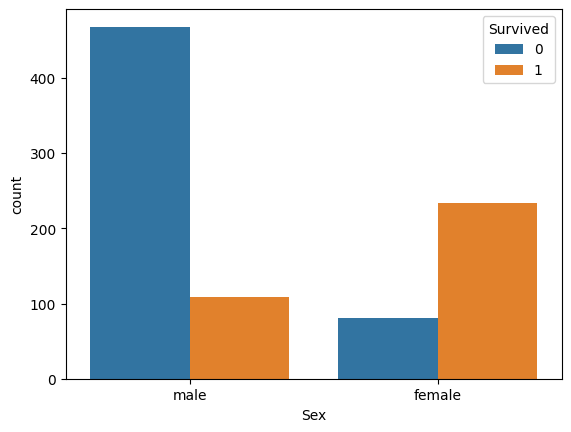

In [7]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.show()

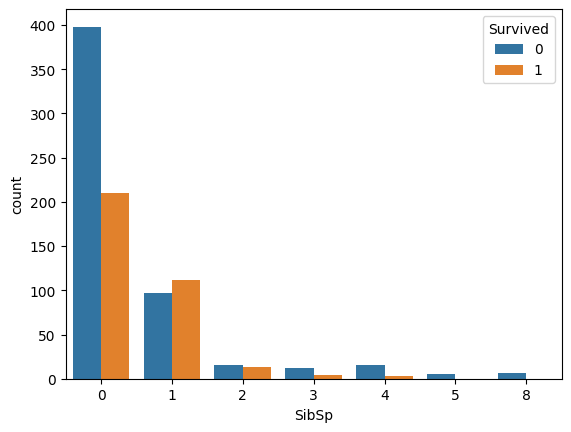

In [8]:
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.show()

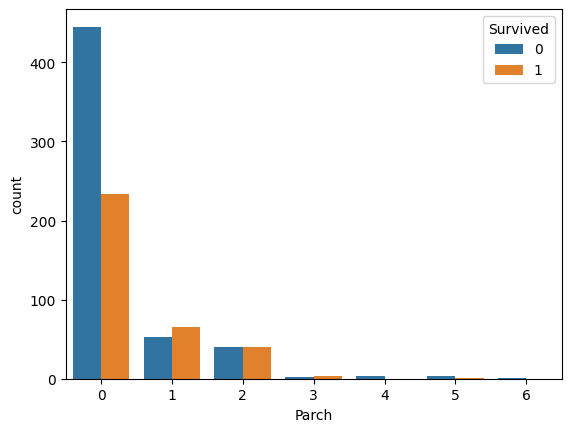

In [9]:
sns.countplot(data=df, x='Parch', hue='Survived')
plt.show()

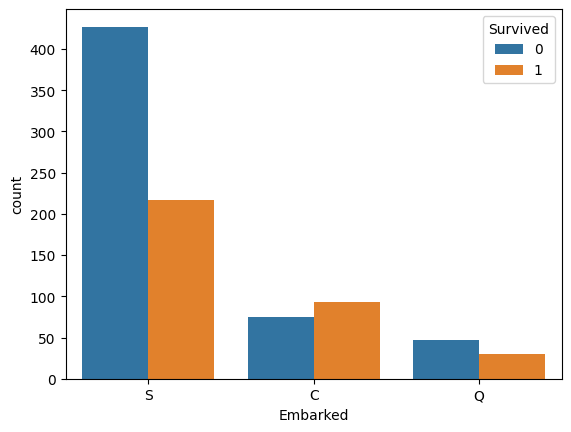

In [10]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.show()

In [11]:
# 결측치 age 중위수 값으로 대체
df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform('median'),inplace=True)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
np.unique(df[df['Cabin'].isnull()]['Pclass'])

array([1, 2, 3], dtype=int64)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

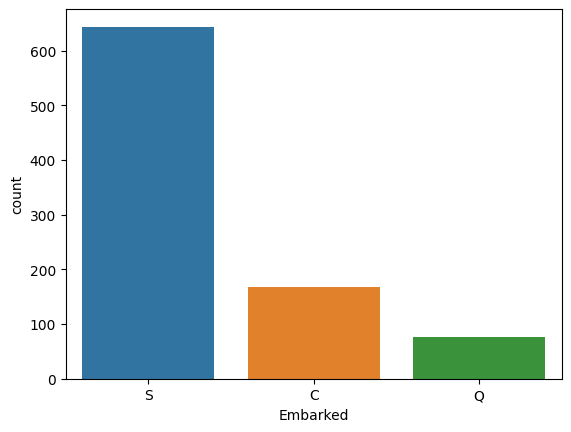

In [14]:
sns.countplot(data=df, x='Embarked')

In [15]:
df['Embarked'].fillna('S',inplace=True)

In [16]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [17]:
X =  df[['Pclass','Sex','SibSp','Parch','Embarked']]
Y = df['Survived']

In [18]:
X.shape, Y.shape

((891, 5), (891,))

In [19]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


In [46]:
# 원핫 인코딩
data = pd.get_dummies(X)
data.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,1,0,0,1
1,1,1,0,1,0,1,0,0
2,3,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,1
4,3,0,0,0,1,0,0,1


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,Y,random_state=0)

In [48]:
x_train.shape

(668, 8)

In [62]:
from tensorflow.keras.losses import binary_crossentropy
dense = Dense(1,activation='sigmoid',input_shape=(8,) )
model = Sequential(dense)
model.compile(loss=binary_crossentropy,metrics='accuracy')

In [63]:
result = model.fit(x_train,y_train,epochs=57,verbose=0)

In [64]:
model.evaluate(x_train,y_train), model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7578


([0.5458305478096008, 0.7410179376602173],
 [0.5350833535194397, 0.7578475475311279])

56

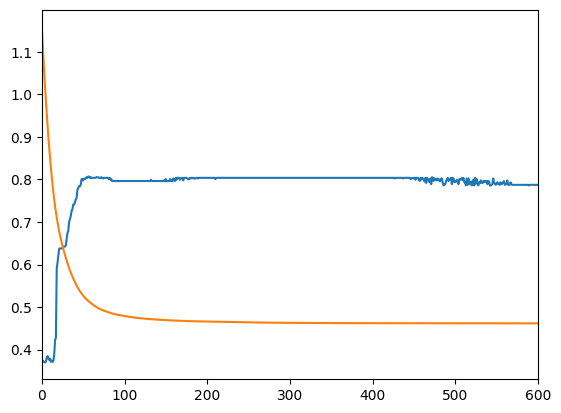

In [61]:
# result.history['loss']
# result.history['accuracy']
plt.plot(range(1000),result.history['accuracy'])
plt.plot(range(1000),result.history['loss'])
plt.xlim(0,600)
np.argmax(result.history['accuracy'])

In [42]:
model.evaluate(x_train,y_train), model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.7937


([0.4615195691585541, 0.78742516040802],
 [0.44505220651626587, 0.7937219738960266])